# Business Understanding

## Project Domain

Domain : perikanan yang menggunakan machine learning untuk memprediksi berat ikan berdasarkan fitur morfologinya.

Fish Weight Prediction adalah proses memperkirakan berat ikan berdasarkan karakteristik fisik seperti panjang, tinggi, dan lebar menggunakan metode komputasi, yaitu dengan machine learning, yang bertujuan untuk menggantikan metode manual yang memerlukan alat ukur dengan solusi otomatis berbasis data. Dengan memanfaatkan data historis dan model prediktif seperti Artificial Neural Network (ANN), sistem ini dapat memberikan estimasi berat ikan secara cepat, akurat, dan efisien tanpa perlu menimbang secara langsung.


## Problem Statements

Masalah yang dihadapi :
*  Alat ukur fisik tidak selalu tersedia di lapangan.

*  Diperlukan metode yang cepat, efisien, dan non-destruktif untuk memperkirakan berat ikan.

*  Kurangnya sistem otomatis yang memanfaatkan data historis untuk prediksi berat.


## Goals

Membangun sistem berbasis AI (Artificial Neural Network) yang dapat mengidentifikasi berat ikan berdasarkan parameter:
                
1. Spesies: Nama spesies ikan
2. Berat: Berat ikan dalam gram
3. Panjang1: Panjang vertikal dalam cm
4. Panjang2: Panjang diagonal dalam cm
5. Panjang3: Panjang melintang dalam cm
6. Tinggi: Tinggi dalam cm
7. Lebar: Lebar diagonal dalam cm

## Solution Statements

* Machine Learning Model Menggunakan Artificial Neural Network (ANN) untuk mengidentifikasi berat ikan berdasarkan dataset.

* Aplikasi Web (Streamlit) Membuat antarmuka yang mudah digunakan bagi penguna untuk memasukkan parameter yang ditentukan untuk mendapatkan data berat ikan.

* Optimasi dengan TensorFlow Lite Model dikonversi ke format TFLite agar ringan dan bisa dijalankan di perangkat dengan sumber daya terbatas.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farhanfaturrachman","key":"cca111133d56a230a107621fb3c40015"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d sushantbmujagule/fish-weight-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/sushantbmujagule/fish-weight-prediction-dataset
License(s): CC0-1.0


In [4]:
!mkdir fish-weight-prediction-dataset
!unzip fish-weight-prediction-dataset.zip -d fish-weight-prediction-dataset
!ls fish-weight-prediction-dataset

Archive:  fish-weight-prediction-dataset.zip
  inflating: fish-weight-prediction-dataset/Fish.csv  
Fish.csv


## Import Library yang dibutuhkan

In [5]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

In [6]:
df = pd.read_csv('fish-weight-prediction-dataset.zip')

In [7]:
df.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [8]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB
None
         Category       Weight      Height       Width     Length1  \
count  159.000000   159.000000  159.000000  159.000000  159.000000   
mean     3.264151   398.326415    8.970994    4.417486   26.247170   
std      1.704249   357.978317    4.286208    1.685804    9.996441   
min      1.000000     0.000000    1.728400    1.047600    7.500000   
25%      2.000000   120.000000    5.944800    3.385650   19.050000   
50%      3.000000 

## Exploratory Data Analysis

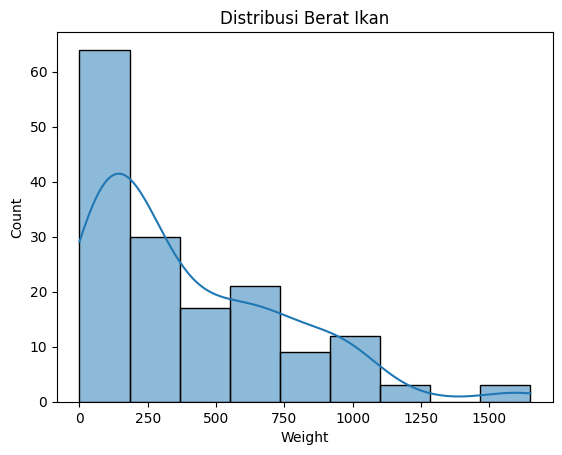

In [9]:
# 1. Distribusi target (berat)
sns.histplot(df["Weight"], kde=True)
plt.title("Distribusi Berat Ikan")
plt.show()

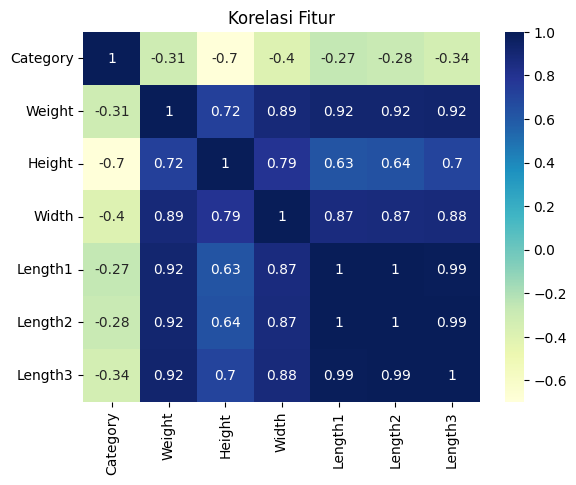

In [10]:
# 2. Korelasi antar fitur
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Korelasi Fitur")
plt.show()

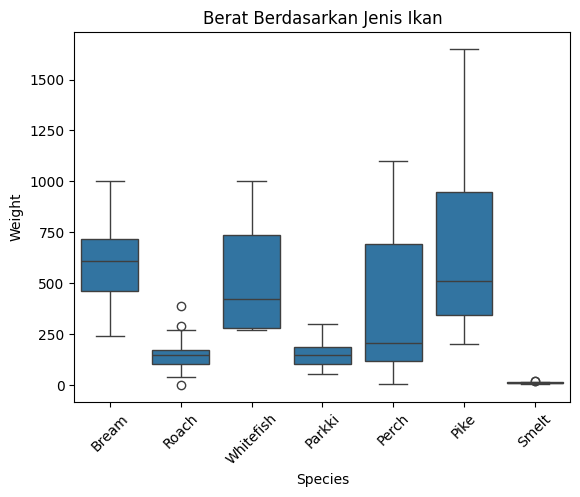

In [11]:
# 3. Berat berdasarkan jenis ikan
sns.boxplot(x="Species", y="Weight", data=df)
plt.title("Berat Berdasarkan Jenis Ikan")
plt.xticks(rotation=45)
plt.show()

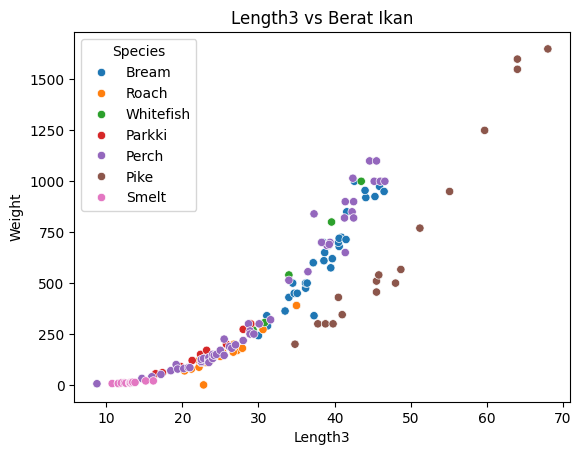

In [12]:
# 4. Scatter panjang vs berat
sns.scatterplot(x="Length3", y="Weight", hue="Species", data=df)
plt.title("Length3 vs Berat Ikan")
plt.show()

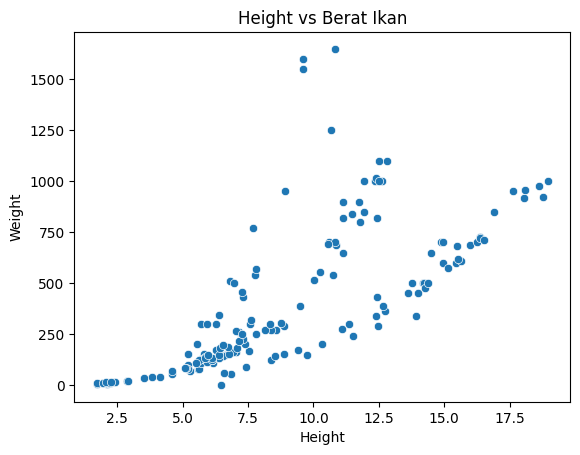

In [13]:
# 5. Scatter height vs weight
sns.scatterplot(x="Height", y="Weight", data=df)
plt.title("Height vs Berat Ikan")
plt.show()

# Data Preparation

In [14]:
# Encode 'Species'
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [15]:
# Fitur dan target
X = df.drop(columns=["Weight"])
y = df["Weight"]

In [16]:
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling

In [18]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output regresi
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 275827.6250 - mae: 387.0485 - val_loss: 160142.1406 - val_mae: 301.1860
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 321038.5000 - mae: 422.2034 - val_loss: 159988.3438 - val_mae: 300.9683
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 269848.5938 - mae: 388.6891 - val_loss: 159839.4219 - val_mae: 300.7560
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 346320.0625 - mae: 435.5765 - val_loss: 159684.1875 - val_mae: 300.5393
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 284542.7500 - mae: 390.8552 - val_loss: 159524.4375 - val_mae: 300.3178
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 279242.8750 - mae: 397.1114 - val_loss: 159348.7656 - val_mae: 300.0847
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 292078.4062 - mae: 396.5035 - val_loss: 159155.7656 - val_mae: 299.8365
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 328133.8125 - mae: 424.5953 - va

# Evaluation

In [21]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
MSE: 11920.25
R2 Score: 0.92


# Deployment

In [22]:
# Simulasi prediksi dari data pertama
sample = scaler.transform([X.iloc[0]])
prediction = model.predict(sample)
predicted_class = le.inverse_transform([np.argmax(prediction)])
print(f"Prediksi Species: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediksi Species: Bream


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model Simulation

In [23]:
# Menampilkan mapping Species
print("\n=== Mapping Species ===")
for i, name in enumerate(le.classes_):
    print(f"{i}: {name}")


=== Mapping Species ===
0: Bream
1: Parkki
2: Perch
3: Pike
4: Roach
5: Smelt
6: Whitefish


In [24]:
# Input manual
print("\nMasukkan data ikan untuk prediksi berat (Weight):")
species_code = int(input("Kode Species (lihat di atas): "))
length1 = float(input("Length1: "))
length2 = float(input("Length2: "))
length3 = float(input("Length3: "))
height = float(input("Height: "))
width = float(input("Width: "))


Masukkan data ikan untuk prediksi berat (Weight):
Kode Species (lihat di atas): 3
Length1: 24
Length2: 29
Length3: 30
Height: 11.52
Width: 4.02


In [25]:
# Format & scale
sample = np.array([[species_code, length1, length2, length3, height, width,0]]) #add 0 for any missing feature to make it 7
sample_scaled = scaler.transform(sample)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
# Prediksi
predicted_weight = model.predict(sample_scaled)
print(f"\n✅ Prediksi Berat Ikan: {predicted_weight[0][0]:.2f} gram")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

✅ Prediksi Berat Ikan: 1594.11 gram


## Save Model

In [27]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmps3yshi5r'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138913831941136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138913831942288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138913831940560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138913831939024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138913831942864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138913831938640: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [28]:
# Simpan model
with open('fish-weight-prediction-dataset.tflite', 'wb') as f:
    f.write(tflite_model)

In [29]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']